In [30]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

housing


{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [31]:
type(housing), housing.keys()

(sklearn.utils._bunch.Bunch,
 dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']))

In [32]:
X = housing.data
y = housing.target

X.shape, y.shape

((20640, 8), (20640,))

In [33]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [34]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled.mean(axis=0), X_train_scaled.mean(axis=0)


# REMEMEBER: We DO NOT scale targets (y values) usually. But Scale y if:

# - we are using neural networks

# - we are using gradient boosting with squared loss instability

# - y has huge magnitude differences (e.g., 1e-9 to 1e9)

# - we are explicitly planning to inverse_transform predictions

(array([-6.51933288e-17, -9.25185854e-18, -1.98108110e-16, -1.70729064e-16,
        -2.15159501e-19,  4.93656580e-17,  6.40099515e-17,  1.75333477e-15]),
 array([-6.51933288e-17, -9.25185854e-18, -1.98108110e-16, -1.70729064e-16,
        -2.15159501e-19,  4.93656580e-17,  6.40099515e-17,  1.75333477e-15]))

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, y_train) # note that we used scaled features (X) but raw targets (y) to fit (train) the model.

lin_reg.coef_, lin_reg.intercept_

(array([ 0.85438303,  0.12254624, -0.29441013,  0.33925949, -0.00230772,
        -0.0408291 , -0.89692888, -0.86984178]),
 np.float64(2.0719469373788777))

In [38]:
import pandas as pd

coef_df = pd.Series(
    lin_reg.coef_,
    index=housing.feature_names
)

coef_df.sort_values(ascending=False)

coef_df


,0
MedInc,0.854383
HouseAge,0.122546
AveRooms,-0.294410
AveBedrms,0.339259
Population,-0.002308
AveOccup,-0.040829
Latitude,-0.896929
Longitude,-0.869842


In [39]:
coef_df.rename_axis('Feature Name')

,0
Feature Name,
MedInc,0.854383
HouseAge,0.122546
AveRooms,-0.294410
AveBedrms,0.339259
Population,-0.002308
AveOccup,-0.040829
Latitude,-0.896929
Longitude,-0.869842


In [40]:
coef_df.name = 'coefficients/weights'
display(coef_df)

,coefficients/weights
MedInc,0.854383
HouseAge,0.122546
AveRooms,-0.294410
AveBedrms,0.339259
Population,-0.002308
AveOccup,-0.040829
Latitude,-0.896929
Longitude,-0.869842




---


**Mental model to keep forever**

fit()      → learn

predict()  → infer

score()    → predict + evaluate


---



In [41]:
# R^2 score

# R^2 = 1 - Unexplained variance/Total variance

# score() internally calls r2_score(y, model.predict(X))


train_r2 = lin_reg.score(X_train_scaled, y_train)
test_r2 = lin_reg.score(X_test_scaled, y_test)

train_r2, test_r2


(0.6125511913966952, 0.575787706032451)

**ELASTIC NET**

Loss=MSE+α(ℓ1​_ratio⋅∣∣w∣∣1​+(1−ℓ1​_ratio)⋅∣∣w∣∣2^2​)

L1 regularization (Lasso) → feature selection (can push weights to 0)

L2 regularization (Ridge) → weight shrinkage (stability)

**l1_ratio: Determines the mix:**

*   l1_ratio = 1: Pure Lasso (only L1 penalty).
*   l1_ratio = 0: Pure Ridge (only L2 penalty).
*   0 < l1_ratio < 1: A hybrid of both.








In [42]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train_scaled, y_train)

elastic_net.coef_

print("="*20)

(elastic_net.coef_ != 0).sum()


np.int64(4)

We expect:

* Train R² slightly lower than Linear Regression

* Test R² equal or higher (less overfitting)

If test R² is worse → regularization is too strong.

In [43]:
elastic_net_train_r2 = elastic_net.score(X_train_scaled, y_train)
elastic_net_test_r2 = elastic_net.score(X_test_scaled, y_test)

elastic_net_train_r2, elastic_net_test_r2

(0.5307617190050338, 0.5147647043408876)

In [44]:
# side by side comparison

import pandas as pd

comparison = pd.DataFrame({
    "Train R2": [train_r2, elastic_net_train_r2],
    "Test R2": [test_r2, elastic_net_test_r2]
}, index=["Linear Regression", "Elastic Net"])

comparison


,Train R2,Test R2
Linear Regression,0.612551,0.575788
Elastic Net,0.530762,0.514765


**1. PCA --> 2. Linear Regression**

steps:

Fit PCA only on training data

Inspect explained variance

Choose number of components

Transform train & test

Train Linear Regression on PCA output

Compare R² with previous models

In [45]:
from sklearn.decomposition import PCA
import numpy as np

# Fit PCA without limiting components (inspect full spectrum)
pca = PCA()

pca.fit(X_train_scaled)

print("* Fractions of variance explained by each component:\n\n", pca.explained_variance_ratio_)


print("\n\n* Cumulative explained variances: (How many components do I need to keep X% of variance?)\n\n", np.cumsum(pca.explained_variance_ratio_))


* Fractions of variance explained by each component:

 [0.25313826 0.23403182 0.15917174 0.12976895 0.12547205 0.08216517
 0.01034161 0.00591041]


* Cumulative explained variances: (How many components do I need to keep X% of variance?)

 [0.25313826 0.48717008 0.64634182 0.77611076 0.90158281 0.98374798
 0.99408959 1.        ]


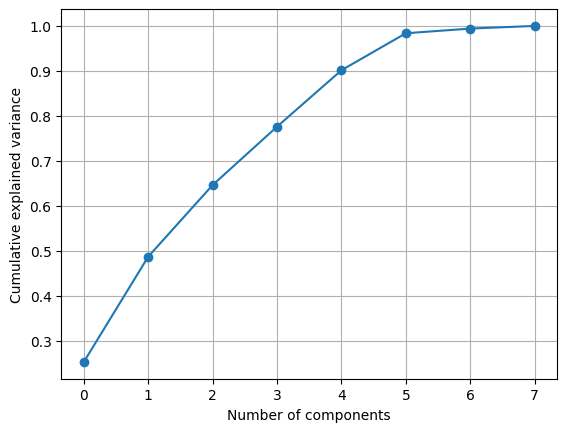

In [46]:
# visualize cumulatvie PCA

import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.show()

In [47]:
# Linear Regression again after PCA

n_components = 5 # 90% explained variance ratio

pca = PCA(n_components=n_components)

# Fit on and transform training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform test data using same PCA
X_test_pca = pca.transform(X_test_scaled)

X_train_pca.shape, X_test_pca.shape


((16512, 5), (4128, 5))

In [48]:
# Train Linear Regression on PCA features
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)

# R^2 scores
pca_train_r2 = lin_reg_pca.score(X_train_pca, y_train)
pca_test_r2 = lin_reg_pca.score(X_test_pca, y_test)

pca_train_r2, pca_test_r2


(0.45672908210341, 0.432923170701341)

In [49]:
# final side by side comparison

final_comparison = pd.DataFrame({
    "Train R2": [train_r2, elastic_net_train_r2, pca_train_r2],
    "Test R2": [test_r2, elastic_net_test_r2, pca_test_r2],
    "Gap": [test_r2 - train_r2, elastic_net_test_r2 - elastic_net_train_r2, pca_test_r2 - pca_train_r2]
}, index=[
    "Linear Regression",
    "Elastic Net",
    "Linear Regression + PCA"
])

final_comparison


,Train R2,Test R2,Gap
Linear Regression,0.612551,0.575788,-0.036763
Elastic Net,0.530762,0.514765,-0.015997
Linear Regression + PCA,0.456729,0.432923,-0.023806


**RESULTS:**

* PCA removed variance that mattered for prediction

* Low dimensionality made PCA unnecessary

* Interpretability is lost



---


تمرین ۲

بررسی Random Forest برای پیش‌بینی بیماری قلبی (Heart Disease)


---



In [50]:
from google.colab import files

uploaded = files.upload()




Saving heart_cleveland_upload.csv to heart_cleveland_upload (1).csv


In [51]:
import pandas as pd

df = pd.read_csv("heart_cleveland_upload.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [52]:
# Features (X) and target (y)
X = df.drop("condition", axis=1)
y = df["condition"]

X.shape, y.shape, df.shape


((297, 13), (297,), (297, 14))

In [53]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((207, 13), (90, 13), (207,), (90,))



---

**n_estimators=100**

* Number of trees in the forest

* More trees → lower variance (up to a point)

**criterion="gini"**

* Trees measure split quality using Gini impurity

**max_depth=4**

* Maximum depth of each tree

* Prevents trees from becoming too complex

* Acts as regularization

**.fit(X_train, y_train)**

* Trains all trees on the training data



---




In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=4,
    random_state=42
)

# fit --> train
rf.fit(X_train, y_train)

# predict
y_predicted = rf.predict(X_test)

print(y_predicted.shape, y_test.shape)

y_predicted

(90,) (90,)


array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0])

In [60]:
# Accuracy on training data
train_accuracy = rf.score(X_train, y_train)

# Accuracy on test data
test_accuracy = rf.score(X_test, y_test)

train_accuracy, test_accuracy


(0.9178743961352657, 0.7666666666666667)



---


**To check overfitting, we compare:**

* Training accuracy

* Testing accuracy

**Interpretation:**

* Big gap → overfitting

* Small gap → good generalization

**If train_accuracy >> test_accuracy → overfitting**



---



In [61]:
import pandas as pd

# rf.feature_importances_
### NumPy array
### Length = number of input features
### Each value = normalized importance score

importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
12,thal,0.168781
7,thalach,0.152510
9,oldpeak,0.126682
11,ca,0.116829
2,cp,0.093020
0,age,0.073144
3,trestbps,0.065617
8,exang,0.050042
4,chol,0.048143
1,sex,0.046070


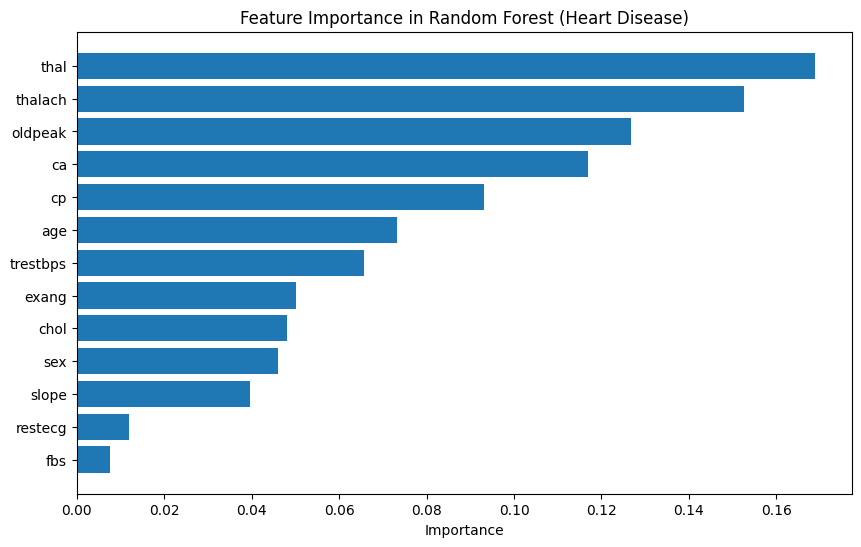

In [66]:
# plot

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"]
)
plt.gca().invert_yaxis() # Puts the most important feature at the top
plt.xlabel("Importance")
plt.title("Feature Importance in Random Forest (Heart Disease)")
plt.show()




---


Chest pain type (cp) **-->** Direct indicator of cardiac issues

Maximum heart rate (thalach) **-->** Reflects heart performance under stress

ST depression (oldpeak) **-->** Strongly linked to ischemia

Number of vessels (ca) **-->** Indicates extent of coronary blockage



---






---


**Random Forest overfits less than a single Decision Tree because it averages the predictions of many trees that are trained on different random subsets of the data and features. This randomness decorrelates the trees, so their individual overfitting behaviors cancel out when combined. As a result, Random Forest significantly reduces variance while maintaining low bias, leading to better generalization.**

**High variance → Overfitting**

**Diversity is critical**


---



**بخش 4: ارزیابی پیشرفته **

**Confusion Matrix و تحلیل خطاها**



---
**Row = actual class, Column = predicted class**

[[TN, FP],

 [FN, TP]]


* TP (True Positive) --> Sick patient correctly detected
* TN (True Negative) --> Healthy patient correctly detected
* FP (False Positive) --> Healthy patient wrongly diagnosed as sick
* FN (False Negative) --> Sick patient wrongly diagnosed as healthy



---






---


* Precision = TP / (TP + FP)

* Recall = TP / (TP + FN) --> sensitivity

* F1-Score = 2 . (Precision - Recall) / (Precision + Recall) --> Balance between false alarms and missed cases.



---



In [69]:
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)

print(y_pred)
print(y_pred.shape)


[1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0]
(90,)


In [70]:
cm = confusion_matrix(y_test, y_pred)
cm
#                  prd:0  prd:1
# actual class 0: [[TN,   FP],
# actual class 1: [FN,   TP]]

array([[37, 11],
       [10, 32]])

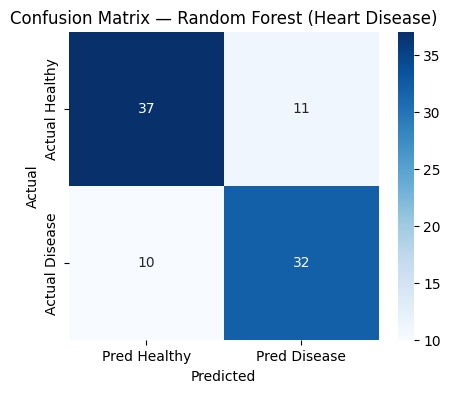

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred Healthy", "Pred Disease"],
    yticklabels=["Actual Healthy", "Actual Disease"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Random Forest (Heart Disease)")
plt.show()


**False Negatives (FN) are more dangerous than False Positives (FP) in heart disease diagnosis.**

**Recall (Sensitivity) is more important than Accuracy**